In [0]:
import cv2
from google.colab.patches import cv2_imshow
from keras.models import load_model
from PIL import Image
import numpy as np
emotions=['Boredome','Confusion','Engaged','Frustration']

Using TensorFlow backend.


In [0]:
from sklearn.externals import joblib
clf=joblib.load('../res/classifier_svm.pkl')
model=load_model('../res/FER_Model.hdf5')
faceCascade=cv2.CascadeClassifier("../res/face.xml")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
def get_class(dest):
  frame=cv2.imread(dest)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
    )

    # Draw a rectangle around the faces
  for (x, y, w, h) in faces:
    img=gray[y:y+h,x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
  clahe_image = clahe.apply(img)
  img1=Image.fromarray(img).resize((48,48))
  img1=np.asarray(img1)
  img1=img1.reshape((48,48,1))
  img1=np.expand_dims(img1,axis=0)
  f=model.predict(img1)
  return clf.predict(f.reshape(1,3200)),frame

The predicted emotion is  Frustration


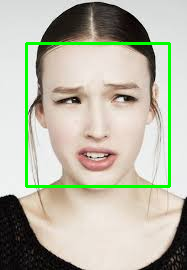

In [0]:
ems,frame=get_class('../test_pics/frustration.png')
print('The predicted emotion is ',emotions[int(ems)])
cv2_imshow(frame)

The predicted emotion is  Engaged


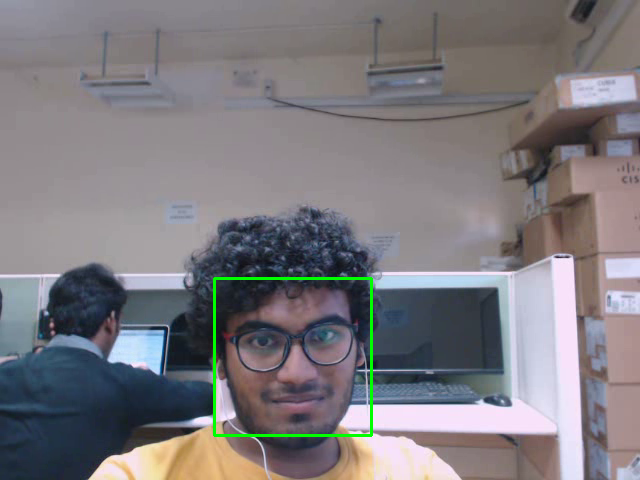

In [78]:
ems,frame=get_class('/test_pics/engaged.png')
print('The predicted emotion is ',emotions[int(ems)])
cv2_imshow(frame)